# Begriffe 2: Overfitting

Mt höhergradigen Polynomen lässt sich die Differenzfunktion immer weiter verkleinern. Dies ist aber nicht immer wünschenswert, denn mit jeder Erhöhung des Grads ds Polynoms entsteht ein neuer Parameter. Dabei entstehen kleine Abweichungen oft nur durch Messfehler bei der Datenerhebung. In der regel ist ein Polynom niedrigen Grades gewünscht, ideal ist eine Ausgleichsgrade.

Diese *Überanpassung* ist ein bekanntes Problem der Ausgleichsrechnung und wird oft auch __Overfitting__ genannt. Es liegt am Anwender der Algorithmen, solches Overfitting zu vermeiden.

### Die Polynomiale Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
 def coeff(x:np.ndarray,y:np.ndarray,N:int):
    """
    Berechnet die Koeffizienten des Gleichungssystems zur Bestimmung des
    optimalen Polynoms.
    x: Die x-Werte
    y: Die y-Werte
    n: Der Grad des Polynoms
    """
    
    # Die Koeffizienten der linken Seite des Gleichungssystems
    A = np.array([[np.sum(x**(n+k)) for k in range(N+1)] for n in range(N+1) ])
    # Die rechte Seite des Gleichungssystems
    b = np.array([np.sum(x**n *y) for n in range(N+1)])
    return A,b

def poly_reg(x:np.ndarray,y:np.ndarray,N:int):
    """
    Die Berechnung der Polynomialen Regression.
    """
    A,b = coeff(x,y,N)
    return np.linalg.solve(A,b)

def poly_gen(a:np.ndarray):
    """
    Erzeugt ein Polynom mit den Koeffizienten a.
    """
    return (lambda x: np.sum([a[k] * x**k for k in range(a.shape[0])]))

def D(x:np.ndarray,y:np.ndarray,f):
    """
    Die Distanzfunktion berechnet die Fehlerquadratsumme
    """
    return np.sum((f(x) - y)**2) 


### Unsere Polynom-Funktionen

In [3]:
from ki_kurs.polynom import Polynom

###  Beispiel für Overfitting

 Wir demonstrieren  Overfitting durch hochgradige Polynome an verrauschten Daten, die eigentlich auf einer quadratischen Parabel liegen.

[ 5.3296261  -3.62248683 65.29249554]


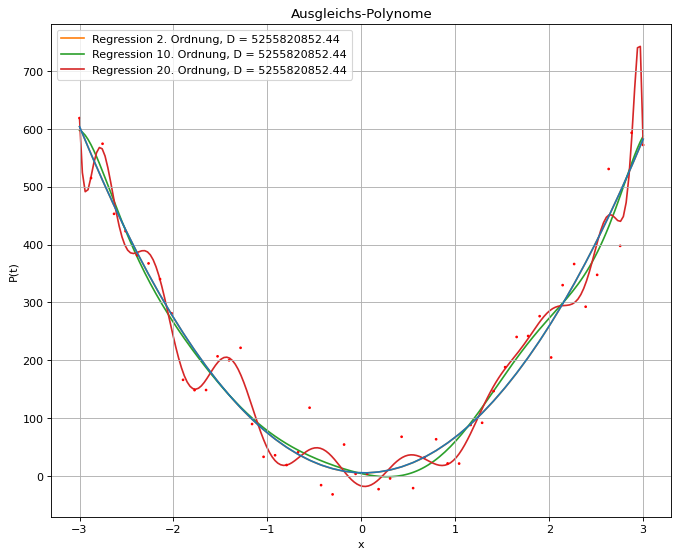

In [4]:
N = 50
x = np.linspace(-3,3,N)
y = np.array([ (value-N/2)**2 for value in range(N)]) + 15*np.random.normal(0,3,N)


fig = plt.figure( figsize=(10, 8), dpi=80)

ax = fig.add_subplot(1,1,1)
ax.set_xlabel('x')
ax.set_ylabel('P(t)')
ax.grid()
ax.set_title("Ausgleichs-Polynome")

print(np.polyfit(x,y,2)[::-1])
P = poly_gen(np.polyfit(x,y,2)[::-1]) 
ax.plot(x,[P(x) for x in x])

#ax.plot(x,y(x,w),label='Original',zorder=0)
for n in (2,10,20):
    p = Polynom(np.polyfit(x,y,n)[::-1])
    xs = np.linspace(-3,3,200)    
    ax.plot(xs,[p.evaluate(x) for x in xs],label=f'Regression {n}. Ordnung, D = {D(x,y,P):0.2f}',zorder=0)
ax.scatter(x,y,color='red',marker='o',s = [2 for n in range(len(x))])
ax.legend()
plt.show()

Die Polynome höherer Ordnung versuchen durch starke Krümmungen, möglichst vielen Punkten nahezukommen. Sie geben sicher nicht den korrekten Zusammenhang zwischen den Punkten wieder.